Declaration: Include the following statement in the beginning of your report. I declare this is my own work in accordance with Seneca College’s Academic Policies.  No part has been copied manually or electronically from any other source (including web sites) or distributed to other students. 

Name: Efat Gorji    

Student Number: 160504197 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("a3.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [4]:
data.isnull().sum().value_counts()

0    32
dtype: int64

In [5]:
data[1].value_counts()

B    357
M    212
Name: 1, dtype: int64

<AxesSubplot:>

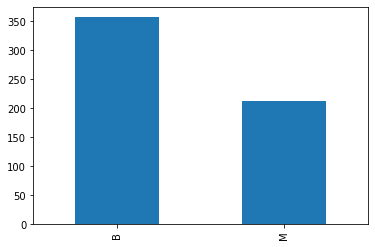

In [6]:
data[1].value_counts().plot(kind='bar')

## train and test set

In [7]:
from sklearn.model_selection import train_test_split

X=data.loc[:,2:31]
y=data[1]

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
print(len(X_train))
print(len(X_test))

455
114


In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

## logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time

t1=time.time()

model1=LogisticRegression(C=1, random_state=0)

model1.fit(X_train_scaled, y_train)
t2=time.time()
lr_time=t2-t1
print("time to train logistic regression with all attributes: {}". format(lr_time))

time to train logistic regression with all attributes: 0.03886842727661133


## SVR

In [54]:
from sklearn.svm import SVC
model2=SVC(C=1, random_state=0, kernel='rbf', gamma='scale')
t1=time.time()
model2.fit(X_train_scaled, y_train)
t2=time.time()
svr_time=t2-t1
print("time to train SVR with all attributes: {}". format(svr_time))

time to train SVR with all attributes: 0.02001190185546875


## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=10)
t1=time.time()
model3.fit(X_train_scaled, y_train)
t2=time.time()
rf_time=t2-t1
print("time to train Random Forest with all attributes: {}". format(rf_time))

time to train Random Forest with all attributes: 0.3980717658996582


# models Evaluation

### accuracy score

In [58]:
from sklearn.metrics import accuracy_score
models=[model1, model2, model3]
for model in models:
    y_hat=model.predict(X_train_scaled)
    score=accuracy_score(y_train, y_hat)
    print("{} accuracy score is: {}".format(model, score))
    

LogisticRegression(C=1, random_state=0) accuracy score is: 0.989010989010989
SVC(C=1, random_state=0) accuracy score is: 0.9846153846153847
RandomForestClassifier(min_samples_split=10, random_state=42) accuracy score is: 0.9912087912087912


### precision, recall, f1 

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
for model in models:
    y_hat=model.predict(X_train_scaled)
    precision=precision_score(y_train, y_hat,pos_label='M')
    recall=recall_score(y_train, y_hat, pos_label='M')
    f1=f1_score(y_train, y_hat, pos_label='M')
    print("{} accuracy measures: \nprecision: {}\nrecall: {}\nf1: {}\n".format(model, precision, recall, f1))

LogisticRegression(C=1, random_state=0) accuracy measures: 
precision: 0.9938271604938271
recall: 0.9757575757575757
f1: 0.9847094801223242

SVC(C=1, random_state=0) accuracy measures: 
precision: 0.99375
recall: 0.9636363636363636
f1: 0.9784615384615384

RandomForestClassifier(min_samples_split=10, random_state=42) accuracy measures: 
precision: 0.9938650306748467
recall: 0.9818181818181818
f1: 0.9878048780487805



# dimensionality reduction

### 95% explained variance 

## fitting the models with reduced dimentions

In [61]:
from sklearn.decomposition import PCA
# logistic regression

pca1=PCA(n_components=0.95, random_state=0)
X_reduced1=pca1.fit_transform(X_train_scaled)

t1=time.time()
model1.fit(X_reduced1, y_train)
t2=time.time()
lr_time_red1=t2-t1
print("time to train logistic regression with reducec attributes 95% explained variance: {}". format(lr_time_red1))

time to train logistic regression with reducec attributes 95% explained variance: 0.02999734878540039


In [62]:
pca1.n_components_

10

In [63]:
pca1.explained_variance_ratio_


array([0.43430767, 0.19740115, 0.09351771, 0.06677661, 0.05642452,
       0.04071619, 0.02149254, 0.01512693, 0.01396763, 0.01160092])

In [64]:
# SVR

t1=time.time()
model2.fit(X_reduced1, y_train)
t2=time.time()
svr_time_red1=t2-t1
print("time to train SVM with reducec attributes 95% explained variance: {}". format(svr_time_red1))

time to train SVM with reducec attributes 95% explained variance: 0.019041061401367188


In [65]:
# Random Forest

t1=time.time()
model3.fit(X_reduced1, y_train)
t2=time.time()
rf_time_red1=t2-t1
print("time to train Random Forest with reducec attributes 95% explained variance: {}". format(rf_time_red1))

time to train Random Forest with reducec attributes 95% explained variance: 0.37407708168029785


### dimensionality equal 2

### fitting the models based on 2 variables

In [66]:
# logistic regression

pca2=PCA(n_components=2, random_state=0)

X_reduced2=pca2.fit_transform(X_train_scaled)

t1=time.time()
model1.fit(X_reduced2, y_train)
t2=time.time()
lr_time_red2=t2-t1
print("time to train logistic regression with reducec attributes to 2: {}". format(lr_time_red1))

time to train logistic regression with reducec attributes to 2: 0.02999734878540039


In [67]:
pca2.n_components_

2

In [68]:
pca2.explained_variance_ratio_

array([0.43430767, 0.19740115])

In [69]:
# SVR

t1=time.time()
model2.fit(X_reduced2, y_train)
t2=time.time()
svr_time_red2=t2-t1
print("time to train SVR with reducec attributes to 2: {}". format(svr_time_red2))

time to train SVR with reducec attributes to 2: 0.012913227081298828


In [70]:
# Random Forest
model3_reduced2= Pipeline([('scaler', StandardScaler()),
                          ('pca2', PCA(n_components=2, random_state=0)),
                          ('randforest', RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=10))])
t1=time.time()
model3.fit(X_reduced2, y_train)
t2=time.time()
rf_time_red2=t2-t1
print("time to train Random Forest with reducec attributes to 2: {}". format(rf_time_red2))

time to train Random Forest with reducec attributes to 2: 0.17724132537841797


<AxesSubplot:>

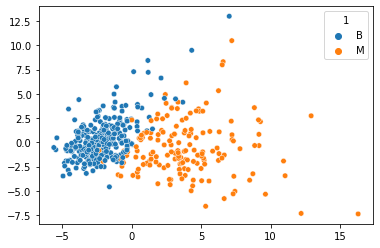

In [71]:
import seaborn as sns

sns.scatterplot(x=X_reduced2[:,0], y=X_reduced2[:,1], hue=y_train, s=30)

## kernel pca

<AxesSubplot:>

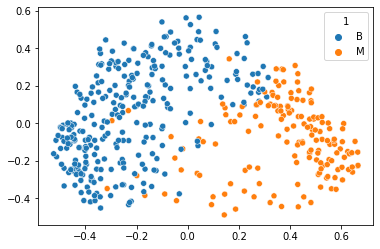

In [72]:
from sklearn.decomposition import KernelPCA
import seaborn as sns

pca_kernel= KernelPCA(n_components=2, kernel="rbf", gamma=0.04)

X_reduced_kernel = pca_kernel.fit_transform(X_train_scaled)

sns.scatterplot(x=X_reduced_kernel[:,0], y=X_reduced_kernel[:,1] , hue=y_train)

## LLE

<AxesSubplot:>

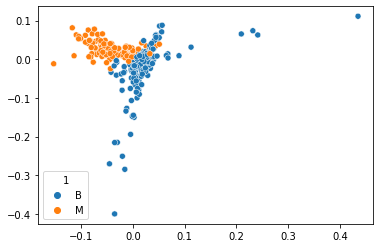

In [73]:
from sklearn.manifold import LocallyLinearEmbedding

lle= LocallyLinearEmbedding(n_components=2, n_neighbors=8)

X_reduced_lle = lle.fit_transform(X_train_scaled)

sns.scatterplot(x=X_reduced_lle[:,0], y=X_reduced_lle[:,1], hue=y_train)

# the best fitted model

## Random Forest

### predicting based on the whole data dimensions

In [75]:
X_test_scaled= scaler.transform(X_test)
model3.fit(X_train_scaled, y_train)
randforest_pred_test=model3.predict(X_test_scaled)

In [76]:
print("the accuracy score of random forest on the test set: {}".format(accuracy_score(y_test,randforest_pred_test)))

the accuracy score of random forest on the test set: 0.9473684210526315


In [77]:
print("precision of the model on test set: {}".format(precision_score(y_test,randforest_pred_test, pos_label='M')))
print("recall of the model on test set: {}".format(recall_score(y_test,randforest_pred_test, pos_label='M')))
print("f1 of the model on test set: {}".format(f1_score(y_test,randforest_pred_test, pos_label='M')))

precision of the model on test set: 0.9361702127659575
recall of the model on test set: 0.9361702127659575
f1 of the model on test set: 0.9361702127659575


### predicting based on the reduced dimensionality with 2 components

In [78]:
model3.fit(X_reduced2, y_train)
X_test_reduced2=pca2.transform(X_test_scaled)
randforest_pred_test_reduced=model3.predict(X_test_reduced2)

In [79]:
print("accuracy of the model with the reduced dimensions test set: {}".format(accuracy_score(y_test,randforest_pred_test_reduced)))

accuracy of the model with the reduced dimensions test set: 0.9210526315789473


In [80]:
print("precision of the model with the reduced dimensions test set: {}".format(precision_score(y_test,randforest_pred_test_reduced, pos_label='M')))
print("recall of the model with the reduced dimensions test set: {}".format(recall_score(y_test, randforest_pred_test_reduced, pos_label='M')))
print("f1 of the model with the reduced dimensions test set: {}".format(recall_score(y_test, randforest_pred_test_reduced, pos_label='M')))

precision of the model with the reduced dimensions test set: 0.8958333333333334
recall of the model with the reduced dimensions test set: 0.9148936170212766
f1 of the model with the reduced dimensions test set: 0.9148936170212766
